<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/DeepKoopman_DiscreteSpectrumExampleExperiment_octave_matlab_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !apt install octave

In [4]:
# !apt-get update


In [16]:
#  !apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-noto-mono ghostscript gnuplot-data
  gnuplot-qt gsfonts imagemagick-6-common info install-info libamd2
  libauthen-sasl-perl libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcupsfilters1 libcupsimage2 libcxsparse3 libdata-dump-perl libemf1
  libencode-locale-perl libfftw3-single3 libfile-listing-perl libfltk-gl1.3
  libfltk1.3 libfont-afm-perl libgail-common libgail18 libglpk40
  libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9 libgs9-common
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libijs-0.35 libio-html-perl
  libio-socket-ssl-perl libjbig2dec0 liblqr-1-0 liblua5.3-0
  liblwp-mediat

In [25]:
ls -lt

total 20924
drwx------ 5 root root    4096 Jan 25 21:26 drive/
drwxr-xr-x 2 root root    4096 Jan 25 20:52 exp1/
drwxr-xr-x 6 root root    4096 Jan 25 20:52 DeepKoopman/
-rw-r--r-- 1 root root 6237943 Jan 25 20:28 DiscreteSpectrumExample_train3_x.csv
-rw-r--r-- 1 root root 6235991 Jan 25 20:28 DiscreteSpectrumExample_train2_x.csv
-rw-r--r-- 1 root root 6237972 Jan 25 20:28 DiscreteSpectrumExample_train1_x.csv
-rw-r--r-- 1 root root 1781219 Jan 25 20:28 DiscreteSpectrumExample_val_x.csv
-rw-r--r-- 1 root root  892153 Jan 25 20:28 DiscreteSpectrumExample_test_x.csv
-rw-r--r-- 1 root root     829 Jan 25 20:28 DiscreteSpectrumExample.m
-rw-r--r-- 1 root root    1166 Jan 25 20:28 DiscreteSpectrumExampleFn.m
-rw-r--r-- 1 root root      13 Jan 25 20:27 test.m
-rw-r--r-- 1 root root      24 Jan 25 20:18 add.m
-rw-r--r-- 1 root root      11 Jan 25 20:17 octave-workspace
drwxr-xr-x 1 root root    4096 Jan  7 14:33 sample_data/


In [5]:
ls -lt /content/DeepKoopman

total 116
drwxr-xr-x 2 root root  4096 Jan 25 23:41 __pycache__/
-rw-r--r-- 1 root root 13482 Jan 25 23:40 training.py
drwxr-xr-x 2 root root  4096 Jan 25 20:46 postprocessing/
drwxr-xr-x 2 root root  4096 Jan 25 20:46 data/
-rw-r--r-- 1 root root 22305 Jan 25 20:46 helperfns.py
-rw-r--r-- 1 root root 20235 Jan 25 20:46 networkarch.py
-rw-r--r-- 1 root root  4106 Jan 25 20:46 README.md
-rw-r--r-- 1 root root  1752 Jan 25 20:46 DiscreteSpectrumExampleExperimentBestParams.py
-rw-r--r-- 1 root root  3220 Jan 25 20:46 DiscreteSpectrumExampleExperiment.py
-rw-r--r-- 1 root root  1864 Jan 25 20:46 FluidFlowBoxExperimentBestParams.py
-rw-r--r-- 1 root root  2354 Jan 25 20:46 FluidFlowBoxExperiment.py
-rw-r--r-- 1 root root  1754 Jan 25 20:46 FluidFlowOnAttractorExperimentBestParams.py
-rw-r--r-- 1 root root  2442 Jan 25 20:46 FluidFlowOnAttractorExperiment.py
-rw-r--r-- 1 root root  1070 Jan 25 20:46 LICENSE
-rw-r--r-- 1 root root  1863 Jan 25 20:46 PendulumExperimentBestParams.py
-rw-r--r-- 

In [1]:
%%writefile add.m
x = 1
y = 2
display(x+y)

Overwriting add.m


In [2]:
# -W : no window system
! octave -W add.m

x =  1
y =  2
 3


In [12]:
%%writefile DiscreteSpectrumExampleFn.m
function X = DiscreteSpectrumExampleFn(x1range, x2range, numICs, tSpan, mu, lambda, seed)

% Koopman example from 3.4.2 (pg 51) of the DMD book
% (Dynamic Mode Decomposition by Kutz, Brunton, Brunton, and Proctor)
% nonlinear dynamical system in two variables, but with 3D Koopman
% observables, have linear dynamical system

% try some initial conditions for x1, x2
# rng(seed)

% randomly start from x1range(1) to x1range(2)
x1 = (x1range(2)-x1range(1))*rand([numICs,1])+x1range(1);

% randomly start from x2range(1) to x2range(2)
x2 = (x2range(2)-x2range(1))*rand([numICs,1])+x2range(1);

lenT = length(tSpan);

X = zeros(numICs*lenT, 2);

count = 1;
% in order to solve more accurately than ode45, map into 3D linear system
% and use exact analytic solution 
for j = 1:numICs
    Y0 = [x1(j); x2(j); x1(j)^2];
    c1 = Y0(1);
    c2 = Y0(2) + (lambda*Y0(3))/(2*mu-lambda);
    c3 = (-lambda*Y0(3))/(2*mu-lambda);
    c4 = Y0(3);
    Y = [c1 * exp(mu*tSpan);
        c2 * exp(lambda*tSpan) + c3 * exp(2*mu*tSpan);
        c4 * exp(2*mu*tSpan)];

    Xhat = Y(1:2,:);
    X(1+(count-1)*lenT : lenT + (count-1)*lenT,:) = Xhat(:,1:lenT)';
    count = count + 1;
end



Overwriting DiscreteSpectrumExampleFn.m


In [13]:
%%writefile DiscreteSpectrumExample.m

numICs = 5000;
filenamePrefix = 'DiscreteSpectrumExample';

x1range = [-.5, .5];
x2range = x1range;
tSpan = 0:0.02:1;
mu = -0.05;
lambda = -1;

seed = 1;
X_test = DiscreteSpectrumExampleFn(x1range, x2range, round(.1*numICs), tSpan, mu, lambda, seed);
filename_test = strcat(filenamePrefix, '_test_x.csv');
dlmwrite(filename_test, X_test, 'precision', '%.14f')

seed = 2;
X_val = DiscreteSpectrumExampleFn(x1range, x2range, round(.2*numICs), tSpan, mu, lambda, seed);
filename_val = strcat(filenamePrefix, '_val_x.csv');
dlmwrite(filename_val, X_val, 'precision', '%.14f')

for j = 1:3
	seed = 2+j;
	X_train = DiscreteSpectrumExampleFn(x1range, x2range, round(.7*numICs), tSpan, mu, lambda, seed);
	filename_train = strcat(filenamePrefix, sprintf('_train%d_x.csv',j));
	dlmwrite(filename_train, X_train, 'precision', '%.14f')
end

Overwriting DiscreteSpectrumExample.m


In [14]:
!octave -W DiscreteSpectrumExample.m

In [15]:
mv 'training (3).py' training.py

In [16]:
ls -lt

total 56
drwxr-xr-x 5 root root  4096 Jan 25 23:46 DeepKoopman/
-rw-r--r-- 1 root root 13442 Jan 25 23:24 training.py
drwxr-xr-x 2 root root  4096 Jan 25 23:04 data/
drwx------ 5 root root  4096 Jan 25 21:26 drive/
drwxr-xr-x 2 root root  4096 Jan 25 20:52 exp1/
-rw-r--r-- 1 root root   829 Jan 25 20:28 DiscreteSpectrumExample.m
-rw-r--r-- 1 root root  1166 Jan 25 20:28 DiscreteSpectrumExampleFn.m
-rw-r--r-- 1 root root    13 Jan 25 20:27 test.m
-rw-r--r-- 1 root root    24 Jan 25 20:18 add.m
-rw-r--r-- 1 root root    11 Jan 25 20:17 octave-workspace
drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data/


In [10]:
%%writefile test.m
x = rand(1,5)

Writing test.m


In [11]:
!octave -W test.m

x =

   0.70212   0.41763   0.31487   0.30467   0.23938



In [16]:
!git clone https://github.com/BethanyL/DeepKoopman

Cloning into 'DeepKoopman'...
remote: Enumerating objects: 353, done.
remote: Total 353 (delta 0), reused 0 (delta 0), pack-reused 353
Receiving objects: 100% (353/353), 7.37 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [5]:
!wget https://raw.githubusercontent.com/BethanyL/DeepKoopman/master/postprocessing/notebookfns.py

--2022-01-26 04:08:53--  https://raw.githubusercontent.com/BethanyL/DeepKoopman/master/postprocessing/notebookfns.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18732 (18K) [text/plain]
Saving to: ‘notebookfns.py’

notebookfns.py      100%[===================>]  18.29K  --.-KB/s    in 0.001s  

2022-01-26 04:08:53 (17.8 MB/s) - ‘notebookfns.py’ saved [18732/18732]



In [6]:
!mv notebookfns.py /content/DeepKoopman/

In [18]:
# !rm -R /content/DeepKoopman/__pycache__

rm: cannot remove '/content/DeepKoopman/__pycache__': No such file or directory


In [7]:
!ls -lt -R /content/DeepKoopman

/content/DeepKoopman:
total 136
-rw-r--r-- 1 root root 18732 Jan 26 04:08 notebookfns.py
drwxr-xr-x 2 root root  4096 Jan 25 23:50 __pycache__
-rw-r--r-- 1 root root 13442 Jan 25 23:49 training.py
drwxr-xr-x 2 root root  4096 Jan 25 20:46 postprocessing
drwxr-xr-x 2 root root  4096 Jan 25 20:46 data
-rw-r--r-- 1 root root 22305 Jan 25 20:46 helperfns.py
-rw-r--r-- 1 root root 20235 Jan 25 20:46 networkarch.py
-rw-r--r-- 1 root root  4106 Jan 25 20:46 README.md
-rw-r--r-- 1 root root  1752 Jan 25 20:46 DiscreteSpectrumExampleExperimentBestParams.py
-rw-r--r-- 1 root root  3220 Jan 25 20:46 DiscreteSpectrumExampleExperiment.py
-rw-r--r-- 1 root root  1864 Jan 25 20:46 FluidFlowBoxExperimentBestParams.py
-rw-r--r-- 1 root root  2354 Jan 25 20:46 FluidFlowBoxExperiment.py
-rw-r--r-- 1 root root  1754 Jan 25 20:46 FluidFlowOnAttractorExperimentBestParams.py
-rw-r--r-- 1 root root  2442 Jan 25 20:46 FluidFlowOnAttractorExperiment.py
-rw-r--r-- 1 root root  1070 Jan 25 20:46 LICENSE
-rw-r--r-

In [17]:
!cp training.py /content/DeepKoopman

In [1]:
!pip install tensorflow==1.13.1

In [1]:
import os
import sys
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [2]:
sys.path.insert(0, '/content/DeepKoopman')
print(sys.path)

['/content/DeepKoopman', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [3]:
import copy
import numpy as np
import random as r

import training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [4]:

params = {}

# settings related to dataset
params['data_name'] = 'DiscreteSpectrumExample'
params['len_time'] = 51
n = 2  # dimension of system (and input layer)
num_initial_conditions = 5000  # per training file
params['delta_t'] = 0.02

# settings related to saving results
params['folder_name'] = 'exp1'

# settings related to network architecture
params['num_real'] = 2
params['num_complex_pairs'] = 0
params['num_evals'] = 2
k = params['num_evals']  # dimension of y-coordinates

# settings related to loss function
params['num_shifts'] = 30
params['num_shifts_middle'] = params['len_time'] - 1
max_shifts = max(params['num_shifts'], params['num_shifts_middle'])
num_examples = num_initial_conditions * (params['len_time'] - max_shifts)
params['recon_lam'] = .1
params['L1_lam'] = 0.0

# settings related to the training
params['num_passes_per_file'] = 15 * 6 * 10
params['num_steps_per_batch'] = 2
params['learning_rate'] = 10 ** (-3)

# settings related to the timing
params['max_time'] = 4 * 60 * 60  # 4 hours
params['min_5min'] = .5
params['min_20min'] = .0004
params['min_40min'] = .00008
params['min_1hr'] = .00003
params['min_2hr'] = .00001
params['min_3hr'] = .000006
params['min_halfway'] = .000006

for count in range(200):  # loop to do random experiments
    params['data_train_len'] = r.randint(1, 3)
    params['batch_size'] = int(2 ** (r.randint(7, 9)))
    steps_to_see_all = num_examples / params['batch_size']
    params['num_steps_per_file_pass'] = (int(steps_to_see_all) + 1) * params['num_steps_per_batch']
    if r.random() < .5:
        params['auto_first'] = 1
    else:
        params['auto_first'] = 0

    params['L2_lam'] = 10 ** (-r.randint(13, 15))
    if r.random() < .5:
        params['Linf_lam'] = 0.0
    else:
        params['Linf_lam'] = 10 ** (-r.randint(6, 10))

    d = r.randint(1, 4)
    if d == 1:
        wopts = np.arange(50, 160, 10)
        w = wopts[r.randint(0, len(wopts) - 1)]
        params['widths'] = [2, w, k, k, w, 2]
    elif d == 2:
        wopts = np.arange(15, 45, 5)
        w = wopts[r.randint(0, len(wopts) - 1)]
        params['widths'] = [2, w, w, k, k, w, w, 2]
    elif d == 3:
        wopts = np.arange(10, 25, 5)
        w = wopts[r.randint(0, len(wopts) - 1)]
        params['widths'] = [2, w, w, w, k, k, w, w, w, 2]
    elif d == 4:
        wopts = np.arange(10, 20, 5)
        w = wopts[r.randint(0, len(wopts) - 1)]
        params['widths'] = [2, w, w, w, w, k, k, w, w, w, w, 2]

    do = r.randint(1, 4)
    if do == 1:
        wopts = np.arange(20, 110, 10)
        wo = wopts[r.randint(0, len(wopts) - 1)]
        params['hidden_widths_omega'] = [wo, ]
    elif do == 2:
        wopts = np.arange(10, 25, 5)
        wo = wopts[r.randint(0, len(wopts) - 1)]
        params['hidden_widths_omega'] = [wo, wo]
    elif do == 3:
        wopts = np.arange(5, 20, 5)
        wo = wopts[r.randint(0, len(wopts) - 1)]
        params['hidden_widths_omega'] = [wo, wo, wo]
    elif do == 4:
        wopts = np.arange(5, 15, 5)
        wo = wopts[r.randint(0, len(wopts) - 1)]
        params['hidden_widths_omega'] = [wo, wo, wo, wo]

    training.main_exp(copy.deepcopy(params))

setting default name of experiment
setting default path for model
[2, 10, 10, 10, 10, 2, 2, 10, 10, 10, 10, 2]
[1, 10, 10, 10, 10, 2]
[1, 10, 10, 10, 10, 1]
setting default: activation function is ReLU
setting default: choosing random seed of 179054145 and saving to params
setting default: distribution for weights on main net is tn (truncated normal)
setting default: distribution for weights on auxiliary net is tn (truncated normal)
setting default: biases in main net will be init. to default number
setting default: biases in auxiliary net will be init. to default number
setting default: scale for weights in main net is 0.1 (applies to tn distribution)
setting default: scale for weights in omega net is 0.1 (applies to tn distribution)
setting default: loss is not relative
setting default: penalty on all shifts from 1 to num_shifts
setting default: penalty on all middle shifts from 1 to num_shifts_middle
setting default: weight on loss3 is 1.0
setting default: use Adam optimizer
setting

KeyboardInterrupt: ignored

In [8]:
%matplotlib inline
# this extension makes it easy to reload the imports without restarting the whole notebook
%load_ext autoreload
# run this cell if you want to reload the imports (i.e. you changed notebookfns.py)

In [9]:
%autoreload

In [10]:
# these are all standard Python modules
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle

In [11]:
# this is my notebookfns.py file
import notebookfns as n

In [12]:
font = {'family' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('lines', linewidth=3)
plt.rc('axes', linewidth=3)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)

In [ ]:
def PlotErrors(errors, logInd):
    print("note that these errors include the weights alpha_1, alpha_2, alpha_3")
    print("red is training error, blue is validation error")
    for j in logInd:
        errors[:, j] = np.log10(errors[:, j])
    f, ax = plt.subplots(3, 3)
    f.set_figwidth(13)
    f.set_figheight(9)
    numErrs = errors.shape[0]
    ax[0, 0].scatter(np.arange(numErrs), errors[:, 0], c='r')
    ax[0, 0].scatter(np.arange(numErrs), errors[:, 1], c='b')
    ax[0, 0].set_ylabel('log10(pre-reg. error)')
    ax[0, 1].scatter(np.arange(numErrs), errors[:, 2], c='r')
    ax[0, 1].scatter(np.arange(numErrs), errors[:, 3], c='b')
    ax[0, 1].set_ylabel('log10(reg. error)')

    ax[1, 0].scatter(np.arange(numErrs), errors[:, 4], c='r')
    ax[1, 0].scatter(np.arange(numErrs), errors[:, 5], c='b')
    ax[1, 0].set_ylabel('log10(loss1: reconstruction)')
    ax[1, 1].scatter(np.arange(numErrs), errors[:, 6], c='r')
    ax[1, 1].scatter(np.arange(numErrs), errors[:, 7], c='b')
    ax[1, 1].set_ylabel('log10(loss2: prediction)')
    ax[1, 2].scatter(np.arange(numErrs), errors[:, 8], c='r')
    ax[1, 2].scatter(np.arange(numErrs), errors[:, 9], c='b')
    ax[1, 2].set_ylabel('log10(loss3: linearity)')

    ax[2, 0].scatter(np.arange(numErrs), errors[:, 10], c='r')
    ax[2, 0].scatter(np.arange(numErrs), errors[:, 11], c='b')
    ax[2, 0].set_ylabel('log10(L_inf)')
    ax[2, 1].scatter(np.arange(numErrs), errors[:, 12], c='r')
    ax[2, 1].scatter(np.arange(numErrs), errors[:, 13], c='b')
    ax[2, 1].set_ylabel('log10(L1)')
    ax[2, 2].scatter(np.arange(numErrs), errors[:, 14], c='r')
    ax[2, 2].scatter(np.arange(numErrs), errors[:, 15], c='b')
    ax[2, 2].set_ylabel('log10(L2)')
    plt.tight_layout()


note that these errors include the weights alpha_1, alpha_2, alpha_3
red is training error, blue is validation error


/content/DeepKoopman/notebookfns.py:10: RuntimeWarning: divide by zero encountered in log10
  errors[:, j] = np.log10(errors[:, j])


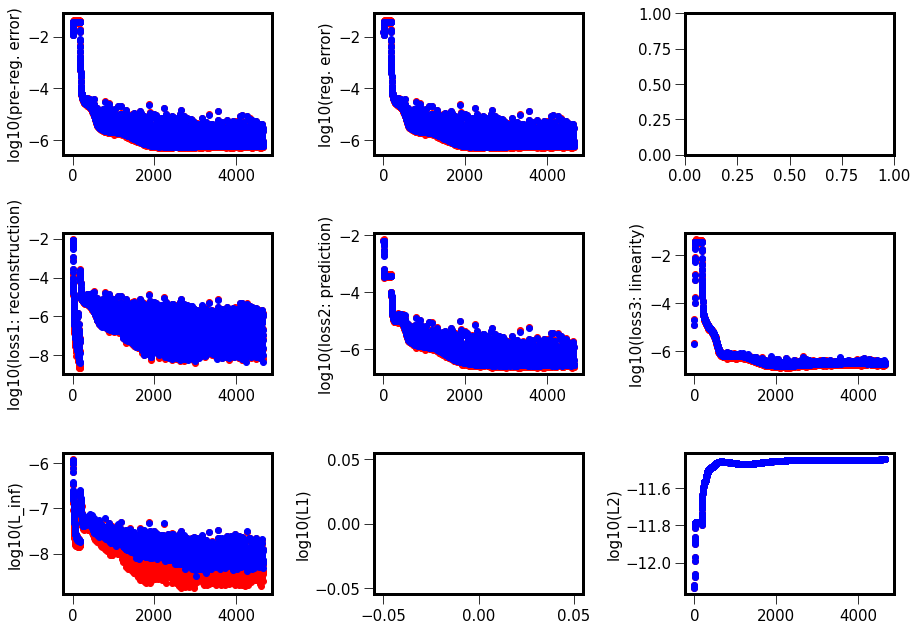

In [20]:
# You can change this filename to point to the pickle file for your model.
# Later code loads the related files (i.e. weights & biases) by changing the end of the filename
fname = '/content/exp1/DiscreteSpectrumExample_2022_01_26_00_52_58_162909_model.pkl'
errors = np.loadtxt(fname.replace('model.pkl','error.csv'),delimiter=',')
n.PlotErrors(errors, range(0,16))

In [21]:
# you may need the encoding part if you save the pickle file in Python 2 and load it in Python 3 
with open(fname, 'rb') as f:
    params = pickle.load(f, encoding='latin1')

In [22]:
print('validation error: %.2E' % params['minTest'])

validation error: 5.32E-07


In [23]:
print('We had %d files of training data.' % params['data_train_len'])
print('Length of trajectories: %d steps (goes in Table 2)' % params['len_time'])
print('Batch size: %d (goes in Table 2)' % params['batch_size'])
deltat = params['delta_t']
print('delta_t (time stepping in data): %.3f' % deltat)
T = deltat*(params['len_time']-1)
tSpan = np.linspace(start=0,stop=T,num=params['len_time'],endpoint=True)
print("Time span is %r" % tSpan)

We had 3 files of training data.
Length of trajectories: 51 steps (goes in Table 2)
Batch size: 256 (goes in Table 2)
delta_t (time stepping in data): 0.020
Time span is array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])


In [24]:
print("For Table 4:")
print('log10 of alpha_1 (the weight on losses involving reconstruction): %.1f' % np.log10(params['recon_lam']))
print('log10 of alpha_2 (the weight on L_inf term): %.1f' % np.log10(params['Linf_lam']))
print('log10 of alpha_3 (the weight on L_2 regularization): %.1f' % np.log10(params['L2_lam']))

For Table 4:
log10 of alpha_1 (the weight on losses involving reconstruction): -1.0
log10 of alpha_2 (the weight on L_inf term): -6.0
log10 of alpha_3 (the weight on L_2 regularization): -13.0


In [25]:
print('The training was allowed to run up to %.1f hours' % (params['max_time']/(60*60)))
print('The training actually ran for %.1f hours' % (params['time_exp']/(60*60)))
if 'stop_condition' in params:
    print('The stop condition was: %s' % params['stop_condition'])
else:
    print('The stop condition was not labeled.')

The training was allowed to run up to 4.0 hours


KeyError: ignored

In [26]:
print('Did we do the autoencoder pre-training? %d' % params['auto_first'])
print('The learning rate was %.2E' % params['learning_rate'])

Did we do the autoencoder pre-training? 1
The learning rate was 1.00E-03


In [27]:
depth = (params['d']-4)/2
print("For Table 3:")
print('The encoder and decoder each had %d hidden layers.' % depth)
print('The widths of the layers of the main network were %r.' % params['widths'])
print('The aux. network had %d hidden layers.' % len(params['hidden_widths_omega']))
print('The widths of the hidden layers of the aux. network were %r.' % params['hidden_widths_omega'])

For Table 3:
The encoder and decoder each had 2 hidden layers.
The widths of the layers of the main network were [2, 20, 20, 2, 2, 20, 20, 2].
The aux. network had 3 hidden layers.
The widths of the hidden layers of the aux. network were [15, 15, 15].


In [28]:
print('We penalized %d (S_p) steps for prediction. (goes in Table 4)' % params['num_shifts'])
print('We penalized %d steps in the linearity loss.' %params['num_shifts_middle'])

We penalized 30 (S_p) steps for prediction. (goes in Table 4)
We penalized 50 steps in the linearity loss.


In [29]:
# load all of the weights and biases into W and b dictionaries
W, b = n.load_weights_koopman(fname, len(params['widths'])-1, len(params['widths_omega_real'])-1, params['num_real'], params['num_complex_pairs'])

In [31]:
# load the validation data
params['data_name'] = 'DiscreteSpectrumExample' # temp fix
X = np.loadtxt('/content/data/DiscreteSpectrumExample_val_x.csv',delimiter=',')

In [32]:
# reshape the validation data
max_shifts_to_stack = n.num_shifts_in_stack(params)
X_stacked, num_traj_val = n.stack_data(X, max_shifts_to_stack, params['len_time'])
print("We used %d trajectories in the validation set." % num_traj_val)
print("Note: accidentally reported in paper that we used more data than we did.")
print("See DiscreteSpectrumExample.m: used 5000*.2 = 1000, not 5000")

# Xk is just the initial conditions of each trajectory
Xk = np.squeeze(X_stacked[0,:,:])

We used 1000 trajectories in the validation set.
Note: accidentally reported in paper that we used more data than we did.
See DiscreteSpectrumExample.m: used 5000*.2 = 1000, not 5000


In [34]:
# apply the network to just the initial conditions Xk
# output the data transformed to y-coordinates (steps k, k+1, k+2, k+3 are steps 0, 1, 2, 3 here)
# also output the reconstructed Xk and the predictions for three steps
yk, ykplus1, ykplus2, ykplus3, xk_recon, xkplus1, xkplus2, xkplus3 = n.ApplyKoopmanNetOmegas(Xk, W, b, params['delta_t'], params['num_real'], 
                                      params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])
#

In [35]:
# here apply the network to the full dataset
# output list of predictions y and list of encded data g_list, like in the training code
y, g_list = n.ApplyKoopmanNetOmegasFull(X_stacked, W, b, params['delta_t'], params['num_shifts'], params['num_shifts_middle'], params['num_real'], params['num_complex_pairs'], 
                                        params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])
#

In [36]:
# calculate the validation loss, split over the loss components
loss1_val, loss2_val, loss3_val, loss_Linf_val, loss_val = n.define_loss(X_stacked, y, g_list, params, W, b)

print('Reconstruction loss (on validation set): %.4E' % loss1_val)
print('Prediction loss (on validation set): %.4E' % loss2_val)
print('Linearity loss (on validation set): %.4E' % loss3_val)
print('L_inf loss (on validation set): %.4E' % loss_Linf_val)
print('Pre-regularization loss (on validation set): %.4E (goes in Table 1)' % loss_val)

Reconstruction loss (on validation set): 1.5583E-08
Prediction loss (on validation set): 2.7129E-07
Linearity loss (on validation set): 3.0713E-07
L_inf loss (on validation set): 6.9563E-09
Pre-regularization loss (on validation set): 6.0096E-07 (goes in Table 1)


In [37]:
loss_L1_val, loss_L2_val, regularized_loss_val = n.define_regularization(params, W, b, loss_val)
print('L1 penalty (on weights): %.4E' % loss_L1_val)
print('L2 penalty (on weights): %.4E' % loss_L2_val)
print('Total regularized loss (on validation set): %.4E' % regularized_loss_val)

L1 penalty (on weights): 0.0000E+00
L2 penalty (on weights): 3.5567E-12
Total regularized loss (on validation set): 6.0096E-07


In [38]:
print('Sanity check:')
print('Compare to validation loss recorded during training: %.4E' % params['minTest'])
print('Compare to regularized validation loss recorded during training: %.4E' %params['minRegTest'])

Sanity check:
Compare to validation loss recorded during training: 5.3188E-07
Compare to regularized validation loss recorded during training: 5.3188E-07


In [39]:
# apply the auxiliary network to the encoded data
omegas = n.omega_net_apply(yk, W, b, params['num_real'], params['num_complex_pairs'], params['num_omega_weights'])

In [40]:
# The auxiliary network outputs the parameters for the eigenvalues in the K matrix.
# For each real eigenvalue, the continuous time version would be mu
# The discrete time version is exp(mu delta t)
# the auxliary network outputs mu for each eigenvalue
print('Mu1 ranges from %.6f to %.6f (little variation in the amount of decay)' % (np.min(omegas[0]), np.max(omegas[0])))
print('Mu2 ranges from %.6f to %.6f (little variation in the amount of decay)' % (np.min(omegas[1]), np.max(omegas[1])))
print('Recall: delta_t = %.2f' % deltat) 

Mu1 ranges from -0.067676 to -0.045870 (little variation in the amount of decay)
Mu2 ranges from -0.999400 to -0.996475 (little variation in the amount of decay)
Recall: delta_t = 0.02


In [41]:
print('To set axis ticks on next two figures:')
print('The first y coordinate ranges from %.3f to %.3f.' % (np.min(yk[:,0]), np.max(yk[:,0])))
print('The second y coordinate ranges from %.3f to %.3f.' % (np.min(yk[:,1]), np.max(yk[:,1])))

To set axis ticks on next two figures:
The first y coordinate ranges from -0.415 to 0.307.
The second y coordinate ranges from -0.166 to 0.112.


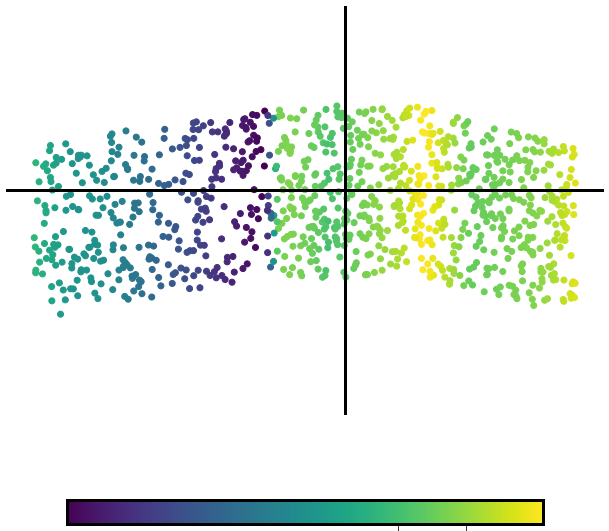

In [42]:
# Supplementary Figure 3
fig = plt.figure(figsize=(16/3*2,16/3*2))
ax = fig.add_subplot(111)
sc = ax.scatter(np.asarray(yk[:,0]), np.asarray(yk[:,1]), c=np.asarray(omegas[0]))
CBI = plt.colorbar(sc, orientation='horizontal', shrink=.8, ticks = [-.0525, -.0494])
CBI.ax.set_xticklabels(['',''])

xlab = [-.5,0,.5]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.3, 0, .3]
plt.yticks(ylab, xlabels)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.axis('equal')

plt.savefig('ToyExampleEvals1.svg', dpi=200, transparent=True)
plt.show()

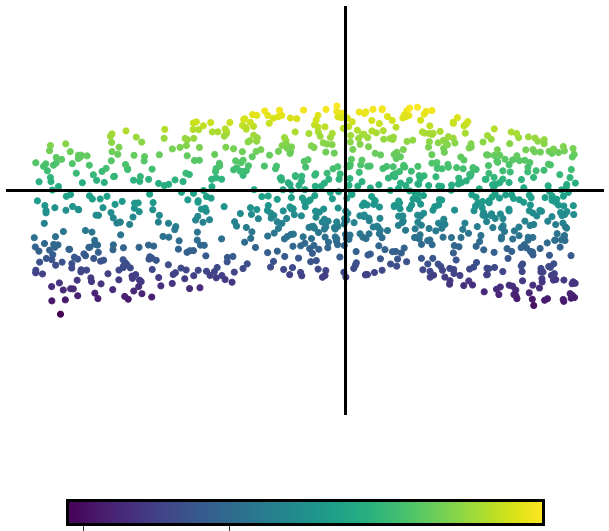

In [43]:
# Supplementary Figure 3
fig = plt.figure(figsize=(16/3*2,16/3*2))
ax = fig.add_subplot(111)
sc = ax.scatter(np.asarray(yk[:,0]), np.asarray(yk[:,1]), c=np.asarray(omegas[1]))
CBI = plt.colorbar(sc, orientation='horizontal', shrink=.8, ticks = [-.9993, -0.9984])
CBI.ax.set_xticklabels(['',''])

xlab = [-.5,0,.5]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.3, 0, .3]
plt.yticks(ylab, xlabels)
#plt.ylim([-.4, .55])
#plt.xlim([-.4, .4])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.axis('equal')

plt.savefig('ToyExampleEvals2.svg', dpi=200, transparent=True)
plt.show()

In [44]:
print('Reconstruction error on initial conditions: %.2E' % np.mean(np.square(Xk - xk_recon)))
print('1-step prediction error on initial conditions: %.2E' % np.mean(np.square(xkplus1 - np.squeeze(X_stacked[1,:,:]))))
print('2-step prediction error on initial conditions: %.2E' % np.mean(np.square(xkplus2 - np.squeeze(X_stacked[2,:,:]))))

Reconstruction error on initial conditions: 1.56E-07
1-step prediction error on initial conditions: 1.56E-07
2-step prediction error on initial conditions: 1.84E-07


In [46]:
print('Relative reconstruction error on initial conditions: %.2E' % (np.mean(np.square(Xk - xk_recon))/np.mean(np.square(Xk))))
print('Relative 1-step prediction error on initial conditions: %.2E' % (np.mean(np.square(xkplus1 - np.squeeze(X_stacked[1,:,:])))/np.mean(np.square(np.squeeze(X_stacked[1,:,:])))))
print('Relative 2-step prediction error on initial conditions: %.2E' % (np.mean(np.square(xkplus2 - np.squeeze(X_stacked[2,:,:])))/np.mean(np.square(np.squeeze(X_stacked[2,:,:])))))



Relative reconstruction error on initial conditions: 1.90E-06
Relative 1-step prediction error on initial conditions: 1.93E-06
Relative 2-step prediction error on initial conditions: 2.33E-06


In [47]:
data = Xk.copy()
# For other plots, it's helpful to consider a full grid of input data
# Create a mesh grid and reshape it
xvals = np.linspace(np.min(data[:,0]),np.max(data[:,0]),400)
yvals = np.linspace(np.min(data[:,1]),np.max(data[:,1]),400)
X, Y = np.meshgrid(xvals, yvals)

grid = np.zeros((160000,2))
grid[:,0] = np.reshape(X, (160000,))
grid[:,1] = np.reshape(Y, (160000,))
print(grid.shape)

(160000, 2)


In [48]:
# Apply the network to the whole grid
grid_yk, grid_ykplus1, grid_ykplus2, grid_ykplus3, grid_xk_recon, grid_xkplus1, grid_xkplus2, grid_xkplus3 = n.ApplyKoopmanNetOmegas(grid, W, b, params['delta_t'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])
grid_reshaped0 = grid_yk[:,0].reshape(400,400)
grid_reshaped1 = grid_yk[:,1].reshape(400,400)
# Nice to draw a black outline
outline_x1 = np.asarray([-0.5, -0.5, 0.5])
outline_y1 = np.asarray([-0.5, 0.5, 0.5])
outline_x2 = np.asarray([-0.5, 0.5, 0.5])
outline_y2 = np.asarray([-0.5, -0.5, 0.5])

1st eigenfunction ranges from -0.4147 to 0.3076
[-0.4 -0.2  0.   0.2  0.4]


<Figure size 432x288 with 0 Axes>

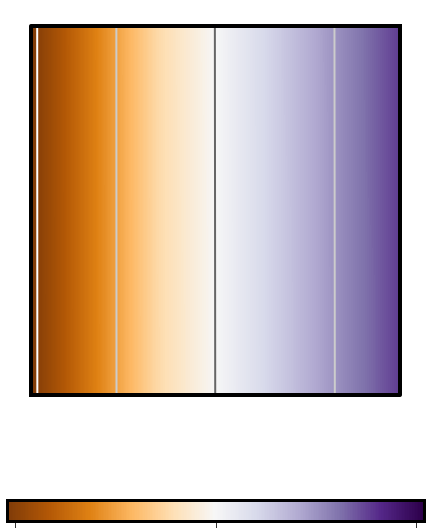

In [49]:
# calculate range of eigenfunction value in order to make colormap good and choose good levels to plot
print("1st eigenfunction ranges from %.4f to %.4f" % (np.min(grid_reshaped0), np.max(grid_reshaped0)))
grid_reshaped0_max = np.max(np.abs(grid_reshaped0))
# 1st eigenfunction ranges from -0.4749 to 0.4789
# Supplementary Figure 2
n.EigenfunctionPlot('PuOr',grid_reshaped0, outline_x1, outline_y1, outline_x2, 
                    outline_y2, X, Y, filename='ToyExampleEigenfunction1.png',
                   levels=np.arange(-.4,.6,.2), cbTicks=[-.4,0,.4],
                   climits=[-grid_reshaped0_max, grid_reshaped0_max])

2nd eigenfunction ranges from -0.1718 to 0.1134
[-0.2 -0.1  0.   0.1  0.2]


<Figure size 432x288 with 0 Axes>

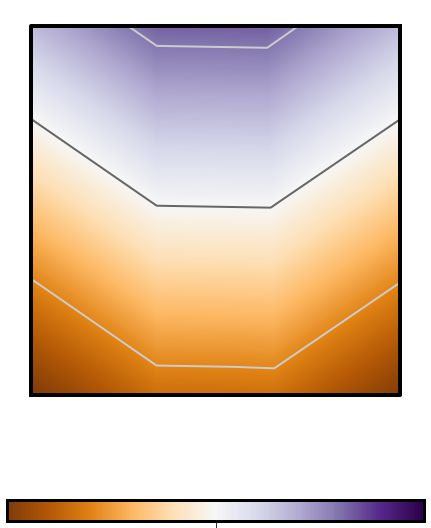

In [50]:
print("2nd eigenfunction ranges from %.4f to %.4f" % (np.min(grid_reshaped1), np.max(grid_reshaped1)))
grid_reshaped1_max = np.max(np.abs(grid_reshaped1))
# 2nd eigenfunction ranges from -0.1696 to 0.2601
# Supplementary Figure 2
n.EigenfunctionPlot('PuOr',grid_reshaped1, outline_x1, outline_y1, outline_x2,
                    outline_y2, X, Y, filename='ToyExampleEigenfunction2.png',
                   levels=np.arange(-.2,.3,.1), cbTicks=[-.26,0,.26],
                   climits=[-grid_reshaped1_max, grid_reshaped1_max])

In [51]:
from sklearn import linear_model

In [52]:
# Ax = y, x in [num_ex, 2], y in [num_ex, 2], A is [num_ex, num_ex] 
print("Do linear regression to see how results compare to analytic option we know works.")
num_ex = grid.shape[0]
grid_aug = np.zeros((num_ex,6))
grid_aug[:,0] = np.ones((num_ex,))
grid_aug[:,1:3] = grid
grid_aug[:,3] = np.square(grid[:,0])
grid_aug[:,4] = np.square(grid[:,1])
grid_aug[:,5] = np.multiply(grid[:,0],grid[:,1])
coeff = np.linalg.lstsq(grid_aug, grid_yk)
print(coeff)

Do linear regression to see how results compare to analytic option we know works.
(matrix([[ 2.42146188e-03, -7.52021376e-04],
        [ 7.00919607e-01,  1.05327391e-03],
        [ 5.18258587e-04,  2.28622592e-01],
        [-2.40700991e-01, -2.39576239e-01],
        [-6.47021998e-05,  1.18451356e-04],
        [ 2.59866895e-04, -6.23134621e-03]]), matrix([[8.71772803, 0.70047125]]), 6, array([402.79925712, 115.67201405, 115.59409086,  33.42747688,
        29.90006252,  29.68849825]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Do linear regression to see how results compare to analytic option we know works.
# (matrix([[-9.44619823e-04,  6.72620120e-04],
#         [-9.48769725e-01, -2.68783228e-03],
#         [ 5.20966024e-05, -3.40873045e-01],
#         [ 1.04102793e-02,  3.65167915e-01],
#         [-8.50750436e-06,  6.70097319e-04],
#         [-4.01731093e-04,  1.93034905e-02]]), matrix([[0.71802764, 0.36076437]]), 6, array([402.78103098, 115.52753251, 115.36312364,  33.31903796,
#         29.80944601,  29.58719677]))
# /usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
# To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
#   # Remove the CWD from sys.path while we load stuff.

In [53]:
print("Do linear regression with Lasso penalty to zero out most coefficients, making it easier to interpret")
clf = linear_model.Lasso(alpha=0.0005)
clf.fit(grid_aug, grid_yk)
print(clf.coef_)
print(clf.coef_[1,2]/clf.coef_[1,3])
rescaledb = clf.coef_[1,3]/(clf.coef_[0,1]**2)
print("compare scaling")
print(clf.coef_[1,2]/rescaledb)

Do linear regression with Lasso penalty to zero out most coefficients, making it easier to interpret
[[ 0.          0.69499793  0.         -0.15138368 -0.          0.        ]
 [ 0.          0.          0.22263735 -0.1502121   0.         -0.        ]]
-1.482153302368665
compare scaling
-0.7159128391585061


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
# Do linear regression with Lasso penalty to zero out most coefficients, making it easier to interpret
# [[ 0.         -0.94275411  0.          0.         -0.         -0.        ]
#  [ 0.         -0.         -0.33487502  0.27481503  0.          0.        ]]
# -1.2185469827844944
# compare scaling
# -1.0830266588370043

In [74]:
!wget 'https://raw.githubusercontent.com/BethanyL/DeepKoopman/master/postprocessing/DiscreteSpectrumExampleTrajs.csv'

--2022-01-26 04:51:42--  https://raw.githubusercontent.com/BethanyL/DeepKoopman/master/postprocessing/DiscreteSpectrumExampleTrajs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 612182 (598K) [text/plain]
Saving to: ‘DiscreteSpectrumExampleTrajs.csv’

DiscreteSpectrumExa 100%[===================>] 597.83K  --.-KB/s    in 0.04s   

2022-01-26 04:51:42 (13.4 MB/s) - ‘DiscreteSpectrumExampleTrajs.csv’ saved [612182/612182]



In [75]:
# Load some nice evenly spaced trajectories that are good for plotting
trajs = np.loadtxt('/content/DiscreteSpectrumExampleTrajs.csv', delimiter=',')

trajs  = trajs.reshape((trajs.shape[0],int(trajs.shape[1]/2), 2))

In [76]:
from matplotlib import cm

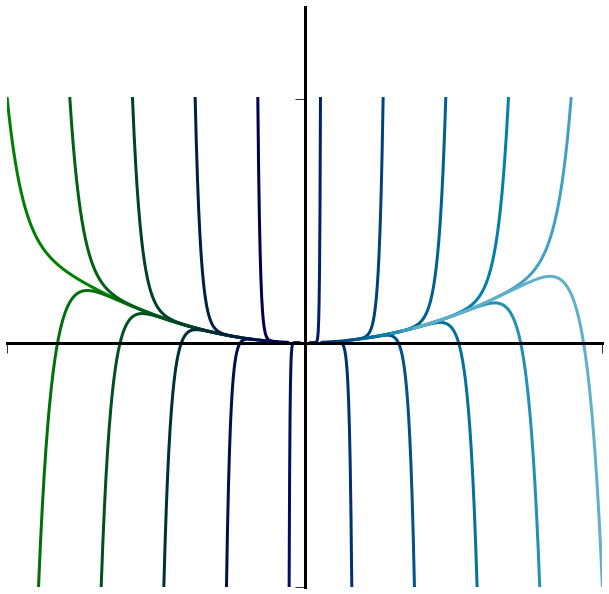

In [77]:
# We plot some nice trajectories from this system
# Left side of Figure 3
# create a special color map (version of ocean color map)
start = 0.0
stop = 1.0
number_of_lines= 25 
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.ocean(x) for x in cm_subsection ]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figwidth(16/3*2)
fig.set_figheight(16/3*2)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1], color=colors[j])
xlab = [-.4,0,.4]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.4, 0, .4]
plt.yticks(ylab, xlabels)
plt.ylim([-.4, .55])
plt.xlim([-.4, .4])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.savefig('ToyExample.svg', dpi=200, transparent=True)

In [78]:
trajs_yk = np.zeros(trajs.shape)
trajs_recon = np.zeros(trajs.shape)
trajs_pred = np.zeros(trajs.shape)
trajs_lambdas = np.zeros(trajs.shape)

print('Eigenvalues for each traj. Note: about constant')
for j in np.arange(trajs.shape[0]):
    traj = np.squeeze(trajs[j,:,:])
    # apply the network to each trajectory
    traj_yk, traj_ykplus1, traj_ykplus2, traj_ykplus3, traj_xk_recon, traj_xkplus1, traj_xkplus2, traj_xkplus3 = n.ApplyKoopmanNetOmegas(traj, W, b, params['delta_t'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

    trajs_yk[j,:,:] = traj_yk.copy()
    trajs_recon[j,:,:] = traj_xk_recon.copy()
    trajs_pred[j,:,:] = traj_xkplus1.copy()
    
    # apply the auxiliary network to each one
    continuous_evals = n.omega_net_apply(traj_yk, W, b, params['num_real'], params['num_complex_pairs'], params['num_omega_weights'])

    # what's the average eigenvalue for this trajectory?
    # (note that for this system, we expect this to be constant along trajectories)
    # note that this is the discrete case: exp(lambda * deltat) if lambda is the eigenvalue in the continuous case
    mean_discrete_evals = np.zeros((len(continuous_evals),))
    for k in np.arange(trajs.shape[2]):
        mean_discrete_evals[k] = np.exp(np.mean(continuous_evals[k], axis=0)*params['delta_t'])
    print(mean_discrete_evals)
    
    # calculate eval^k for k = 0, 1, ....
    # should match if really have linear system    
    for k in np.arange(trajs.shape[1]):
        for l in np.arange(trajs.shape[2]):
            trajs_lambdas[j,k,l] = np.power(mean_discrete_evals[l],k)

Eigenvalues for each traj. Note: about constant
[0.99874988 0.9802452 ]
[0.99876696 0.98024344]
[0.99879166 0.98024552]
[0.99882499 0.98024374]
[0.99886952 0.98024574]
[0.9989298  0.98024381]
[0.99898823 0.98024554]
[0.99897753 0.98024343]
[0.99896312 0.98024522]
[0.99896859 0.98024326]
[0.99898115 0.9802452 ]
[0.99899368 0.98024337]
[0.99900624 0.98024545]
[0.99902064 0.98024377]
[0.99903843 0.98024583]
[0.99904488 0.98024393]
[0.99904147 0.98024569]
[0.9990355  0.98024365]
[0.99902976 0.98024535]
[0.99902346 0.98024329]


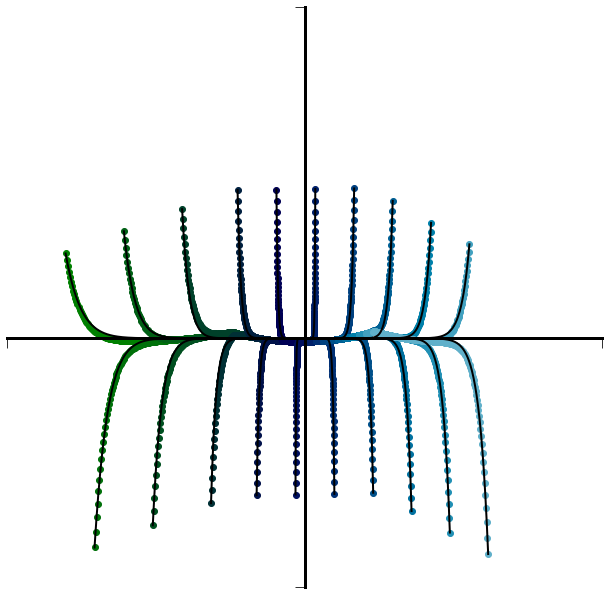

In [79]:
# Right side of Figure 3
# to check if really linear, 
# compare normalized eval^k (k = 0, 1, ...) to the y-coordinates
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figwidth(16/3*2)
fig.set_figheight(16/3*2)

subset = np.arange(0,trajs.shape[1],4)

for j in np.arange(trajs.shape[0]):
    scale0 = trajs_yk[j,0,0]
    scale1 = trajs_yk[j,0,1]
    plt.plot(np.array(trajs_lambdas[j,:,0]*scale0), np.array(trajs_lambdas[j,:,1]*scale1), 'k', linewidth=2)
    ax.scatter(np.array(trajs_yk[j,subset,0]),np.array(trajs_yk[j,subset,1]), color=colors[j])

    
#plt.axis('equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xlab = [-.4,0,.4]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.15, 0, .2]
plt.yticks(ylab, xlabels)
#plt.ylim([-.4, .55])
#plt.xlim([-.4, .4])


plt.savefig('ToyExampleLinear.svg', dpi=200, transparent=True)

([<matplotlib.axis.YTick at 0x7f3c5d6fa390>,
 [])

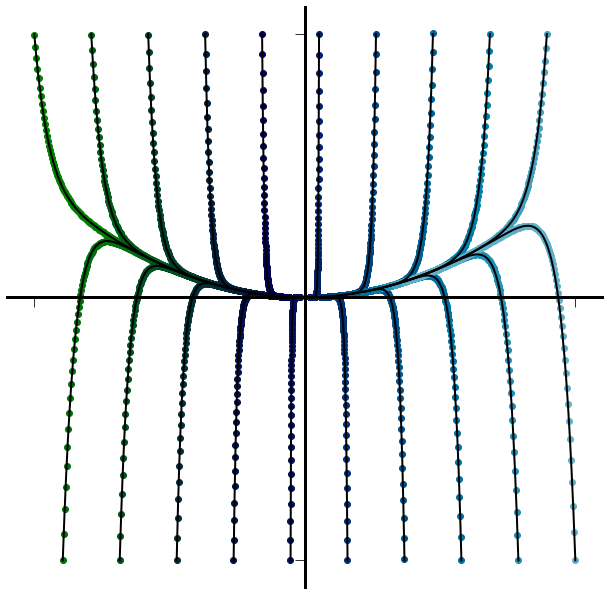

In [80]:
# plot reconstruction error
fig = plt.figure(figsize=(16/3*2, 16/3*2))
ax = fig.add_subplot(111)
subset = np.arange(0,trajs.shape[1],4)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1], 'k', linewidth=2)
    temp2 = trajs_recon[j,:,:].copy()
    plt.scatter(temp2[subset,0],temp2[subset,1],color=colors[j])
    
#plt.axis('equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xlab = [-.4,0,.4]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.4, 0, .4]
plt.yticks(ylab, xlabels)


#plt.savefig('ToyExampleRecon.png', dpi=200, transparent=True)

([<matplotlib.axis.YTick at 0x7f3c5d63d090>,
 [])

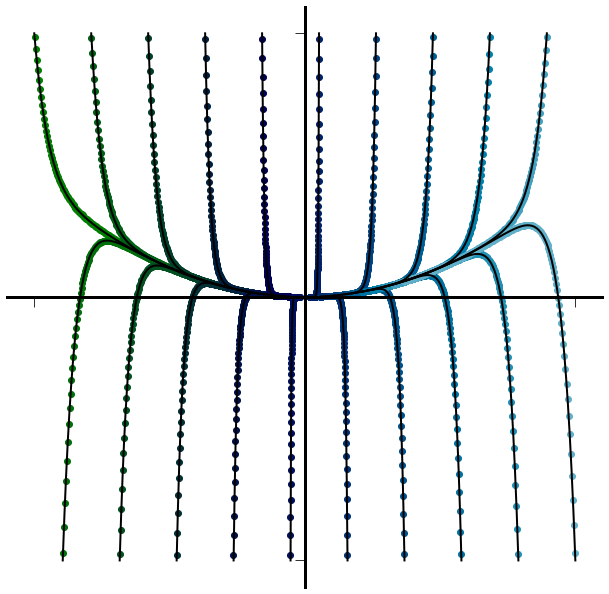

In [81]:
# plot 1-step prediction error
fig = plt.figure(figsize=(16/3*2, 16/3*2))
ax = fig.add_subplot(111)
subset = np.arange(0,trajs.shape[1],4)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1], 'k', linewidth=2)
    temp2 = trajs_pred[j,:,:].copy()
    plt.scatter(temp2[subset,0],temp2[subset,1],color=colors[j])
    
#plt.axis('equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
xlab = [-.4,0,.4]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.4, 0, .4]
plt.yticks(ylab, xlabels)

In [82]:
# now apply network to these trajectories again, but this time for many steps
# this time, only network initial condition of each trajectory.
trajs_long_pred = np.zeros(trajs.shape)

num_steps = trajs.shape[1]-1

for j in np.arange(trajs.shape[0]):
    ic = np.squeeze(trajs[j,0,:])
    trajs_long_pred[j,0,:] = ic
    trajs_long_pred[j,1:,:] = n.PredictKoopmanNetOmegas(ic, W, b, deltat, num_steps, params['num_real'], params['num_complex_pairs'], 
                                                        params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

trajectory 0: worst rel. error 0.101
	first ind with error > 10p: 937 of 1001
trajectory 1: worst rel. error 0.101
	first ind with error > 10p: 826 of 1001
trajectory 2: worst rel. error 0.101
	first ind with error > 10p: 701 of 1001
trajectory 3: worst rel. error 0.101
	first ind with error > 10p: 560 of 1001
trajectory 4: worst rel. error 0.101
	first ind with error > 10p: 393 of 1001
trajectory 5: worst rel. error 0.101
	first ind with error > 10p: 187 of 1001
trajectory 6: worst rel. error 0.119
	first ind with error > 10p: 913 of 1001
trajectory 7: worst rel. error 0.201
	first ind with error > 10p: 576 of 1001
trajectory 8: worst rel. error 0.370
	first ind with error > 10p: 139 of 1001
trajectory 9: worst rel. error 1.151
	first ind with error > 10p: 89 of 1001
trajectory 10: worst rel. error 1.118
	first ind with error > 10p: 90 of 1001
trajectory 11: worst rel. error 0.340
	first ind with error > 10p: 223 of 1001
trajectory 12: worst rel. error 0.168
	first ind with error > 10

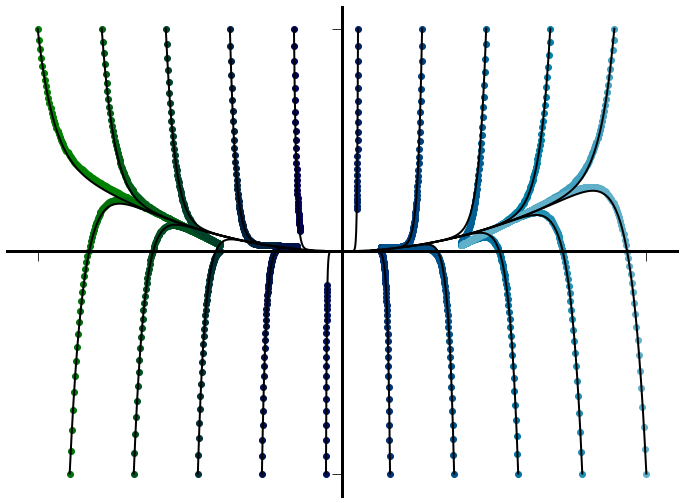

In [83]:
# Supplementary Figure 1b
# plot long-term prediction:
# if only give network initial condition, then have network predict many steps, how long is it accurate?

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1], 'k', linewidth=2)
    temp2 = trajs_long_pred[j,:,:].copy()
    
    diffs = np.linalg.norm(temp - temp2,ord=2,axis=1)

    normalize = np.linalg.norm(temp,ord=2,axis=1)
    relerr = diffs/normalize
    print("trajectory %d: worst rel. error %.3f" % (j, np.max(relerr)))
    indBigErr = np.nonzero(relerr > .1) # 10% error 
    if len(indBigErr[0]) > 0:
        print("\tfirst ind with error > 10p: %d of %d"  % (indBigErr[0][0], trajs.shape[1]))
        indEnd = indBigErr[0][0]
    else:
        indEnd = trajs.shape[1]

    subset = np.arange(0,indEnd,4)
    plt.scatter(temp2[subset,0],temp2[subset,1],color=colors[j])
    
xlab = [-.4,0,.4]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-.4, 0, .4]
plt.yticks(ylab, xlabels)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.savefig('ToyExampleLongPrediction.svg', dpi=200, transparent=True)

In [84]:
# shape: num_examples, num_steps, n
# send initial conditions through network again, but predict many steps (50)
print('We now predict the initial conditions %d steps forward' % max_shifts_to_stack)
long_pred_Xk = n.PredictKoopmanNetOmegas(Xk, W, b, deltat, max_shifts_to_stack, params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], 
                                         params['num_omega_weights'], params['num_decoder_weights'])
# We now predict the initial conditions 50 steps forward
# how does prediction error change with the number of prediction steps?
# we expect it to accumulate error, but hopefully not too fast
long_pred_error = np.zeros((max_shifts_to_stack, ))
for j in np.arange(max_shifts_to_stack):
    long_pred_error[j] = np.mean(np.mean(np.square(long_pred_Xk[:,j,:] - X_stacked[j+1,:,:]), axis=0)) 

We now predict the initial conditions 50 steps forward


log10 error ranges from -6.81 to -4.92


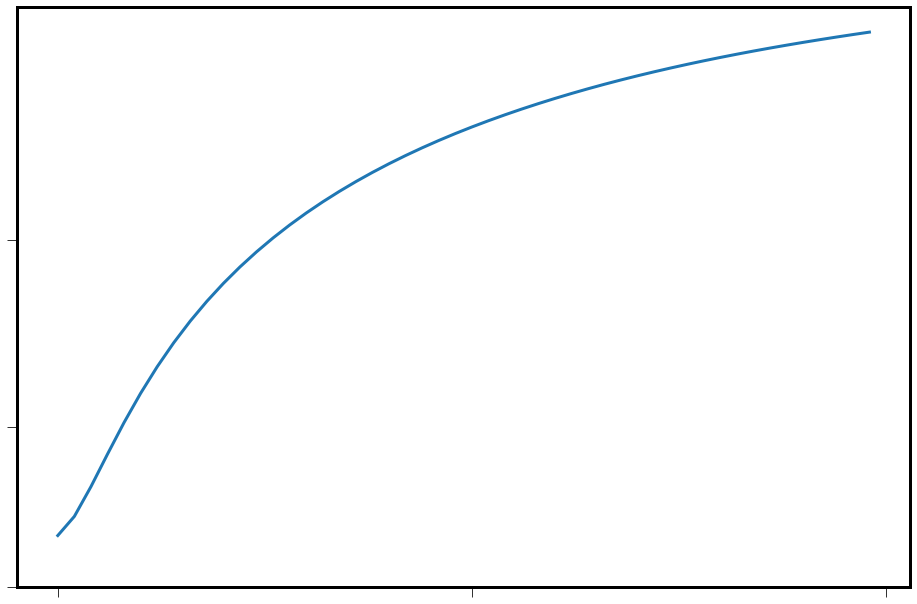

In [85]:
# so we can put ticks in good places
print('log10 error ranges from %.2f to %.2f' % (min(np.log10(long_pred_error)), max(np.log10(long_pred_error))))
# log10 error ranges from -7.03 to -5.76
# Supplementary Figure 1a
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figwidth(16)
fig.set_figheight(16/3*2)

plt.plot(np.arange(max_shifts_to_stack), np.log10(long_pred_error), linewidth=3)

xlab = [0,max_shifts_to_stack/2, max_shifts_to_stack]
xlabels = ''
plt.xticks(xlab,xlabels)
ylab = [-5.7,-6.4,-7.0]
ylabels = ''
plt.yticks(ylab,ylabels)
fig.savefig('ToyExamplePredOverSteps.svg', dpi=200, transparent=True)

In [89]:
params

{'L1_lam': 0.0,
 'L2_lam': 1e-13,
 'Linf_lam': 1e-06,
 'act_type': 'relu',
 'auto_first': 1,
 'batch_size': 256,
 'been1hr': array([1.45909394e-06]),
 'been20min': array([1.87084757e-05]),
 'been2hr': array([5.31881144e-07]),
 'been3hr': array([5.31881144e-07]),
 'been40min': array([2.17120504e-06]),
 'been4hr': 0,
 'been5min': array([0.01160263]),
 'beenHalf': array([5.31881144e-07]),
 'd': 8,
 'data_name': 'DiscreteSpectrumExample',
 'data_train_len': 3,
 'decay_rate': 0,
 'delta_t': 0.02,
 'dist_biases': [0, 0, 0, 0, 0, 0, 0],
 'dist_biases_omega': [0, 0, 0, 0],
 'dist_weights': ['tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'tn'],
 'dist_weights_omega': ['tn', 'tn', 'tn', 'tn'],
 'exp_suffix': '_2022_01_26_00_52_58_162909',
 'folder_name': 'exp1',
 'hidden_widths_omega': [15, 15, 15],
 'learning_rate': 0.001,
 'len_time': 51,
 'max_time': 14400,
 'mid_shift_lam': 1.0,
 'minRegTest': 5.318846759454006e-07,
 'minRegTrain': 4.863049258159158e-07,
 'minTest': 5.318811439309157e-07,
 'minTrain': 

In [95]:
dir(n.loss_training)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [91]:
n.loss_training(params, max_shifts_to_stack, W, b)

OSError: ignored

In [88]:
# moved this to the bottom because it's so slow
loss1_train, loss2_train, loss3_train, loss_Linf_train, loss_train, regularized_loss_train, total_num_traj = n.loss_training(params, max_shifts_to_stack, W, b)
print("# training traj: %d (goes in Table 2)" % total_num_traj)
print("Note: accidentally reported in paper that we used more data than we did.")
print("See DiscreteSpectrumExample.m: used 5000*.7 = 3500 per file, not 5000")

OSError: ignored

In [70]:
# print('Reconstruction loss (on train set): %.4E' % loss1_train)
# print('Prediction loss (on train set): %.4E' % loss2_train)
# print('Linearity loss (on train set): %.4E' % loss3_train)
# print('L_inf loss (on train set): %.4E' % loss_Linf_train)
# print('Pre-regularization loss (on train set): %.4E (goes in Table 1)' % loss_train)
# print('Total regularized loss (on train set): %.4E' % regularized_loss_train)

In [71]:
# We decided to report this example in the paper, so now we can calcuate test errror
# loss1_test, loss2_test, loss3_test, loss_Linf_test, loss_test, regularized_loss_test = n.loss_test(params, max_shifts_to_stack, W, b)
# print("Note: accidentally reported in paper that we used more data than we did.")
# print("See DiscreteSpectrumExample.m: used 5000*.1 = 500 for testing, not 5000")

In [72]:
# print('Reconstruction loss (on test set): %.4E' % loss1_test)
# print('Prediction loss (on test set): %.4E' % loss2_test)
# print('Linearity loss (on test set): %.4E' % loss3_test)
# print('L_inf loss (on test set): %.4E' % loss_Linf_test)
# print('Pre-regularization loss (on test set): %.4E (goes in Table 1)' % loss_test)
# print('Total regularized loss (on test set): %.4E' % regularized_loss_test)

In [73]:
# print("Could be that error would be higher on larger test set, so try larger one.")
# print("Check test error on larger test set:")
# loss1_testextra, loss2_testextra, loss3_testextra, loss_Linf_testextra, loss_testextra, regularized_loss_testextra = n.loss_test(params, max_shifts_to_stack, W, b, suffix='testextra')
# print('Reconstruction loss (on larger test set): %.4E' % loss1_testextra)
# print('Prediction loss (on larger test set): %.4E' % loss2_testextra)
# print('Linearity loss (on larger test set): %.4E' % loss3_testextra)
# print('L_inf loss (on larger test set): %.4E' % loss_Linf_testextra)
# print('Pre-regularization loss (on larger test set): %.4E (compare to numbers in Table 1)' % loss_testextra)
# print('Total regularized loss (on larger test set): %.4E' % regularized_loss_testextra)

In [68]:
print("Good news: error even lower on larger test set!")

Good news: error even lower on larger test set!


In [10]:
!ls -lt

total 104
drwxr-xr-x 5 root root  4096 Jan 25 23:46  DeepKoopman
-rw-r--r-- 1 root root 13442 Jan 25 23:24 'training (3).py'
-rw-r--r-- 1 root root 13482 Jan 25 23:15 'training (2).py'
-rw-r--r-- 1 root root 13543 Jan 25 23:06 'training (1).py'
drwxr-xr-x 2 root root  4096 Jan 25 23:04  data
-rw-r--r-- 1 root root 13482 Jan 25 22:55  training.py
drwx------ 5 root root  4096 Jan 25 21:26  drive
drwxr-xr-x 2 root root  4096 Jan 25 20:52  exp1
-rw-r--r-- 1 root root   829 Jan 25 20:28  DiscreteSpectrumExample.m
-rw-r--r-- 1 root root  1166 Jan 25 20:28  DiscreteSpectrumExampleFn.m
-rw-r--r-- 1 root root    13 Jan 25 20:27  test.m
-rw-r--r-- 1 root root    24 Jan 25 20:18  add.m
-rw-r--r-- 1 root root    11 Jan 25 20:17  octave-workspace
drwxr-xr-x 1 root root  4096 Jan  7 14:33  sample_data


In [8]:
ls -lt /content/data

total 20888
-rw-r--r-- 1 root root 6237943 Jan 25 20:28 DiscreteSpectrumExample_train3_x.csv
-rw-r--r-- 1 root root 6235991 Jan 25 20:28 DiscreteSpectrumExample_train2_x.csv
-rw-r--r-- 1 root root 6237972 Jan 25 20:28 DiscreteSpectrumExample_train1_x.csv
-rw-r--r-- 1 root root 1781219 Jan 25 20:28 DiscreteSpectrumExample_val_x.csv
-rw-r--r-- 1 root root  892153 Jan 25 20:28 DiscreteSpectrumExample_test_x.csv


In [7]:
!mv *.csv ./data/

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
files.upload()

Saving training.py to training (3).py


{'training.py': b'import os\nimport time\n\nimport numpy as np\nimport tensorflow as tf\n\nimport helperfns\nimport networkarch as net\n\n\ndef define_loss(x, y, g_list, weights, biases, params):\n    """Define the (unregularized) loss functions for the training.\n\n    Arguments:\n        x -- placeholder for input\n        y -- list of outputs of network for each shift (each prediction step)\n        g_list -- list of output of encoder for each shift (encoding each step in x)\n        weights -- dictionary of weights for all networks\n        biases -- dictionary of biases for all networks\n        params -- dictionary of parameters for experiment\n\n    Returns:\n        loss1 -- autoencoder loss function\n        loss2 -- dynamics/prediction loss function\n        loss3 -- linearity loss function\n        loss_Linf -- inf norm on autoencoder loss and one-step prediction loss\n        loss -- sum of above four losses\n\n    Side effects:\n        None\n    """\n    # Minimize the me